## 7장 6절 군집분석

### 계층적 군집분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_usa = pd.read_csv('./data/USArrests.csv')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
df_usa

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df_usa.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labellist = df_usa['State'].tolist()
df_usa.head()
labellist

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [5]:
len(labellist)

50

#### 최단연결법

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [7]:
single = linkage(df_usa.loc[:, 'Murder':], metric='euclidean', method='single')

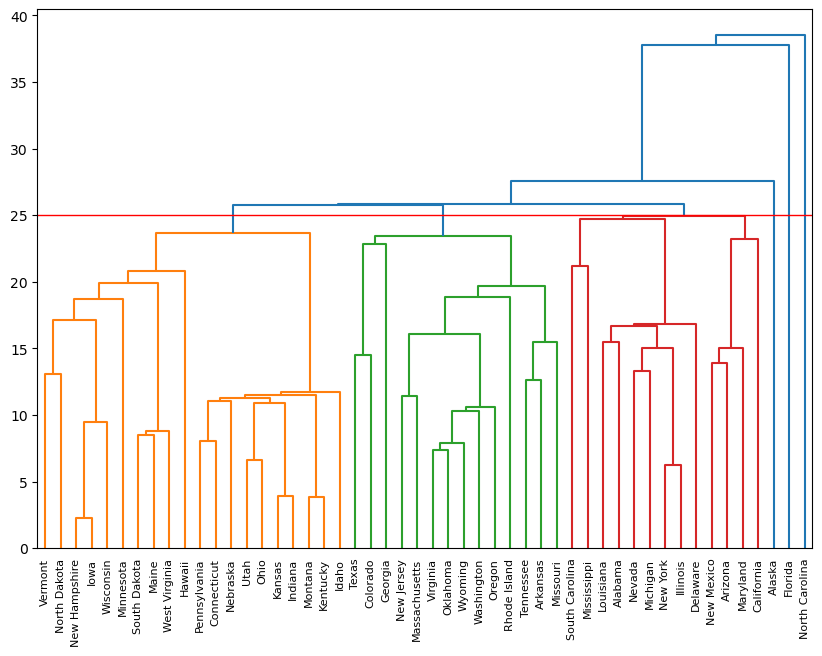

In [8]:
plt.figure(figsize=(10,7))
dendrogram(single, orientation='top', labels=labellist, distance_sort='descending', color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1)
plt.show()

#### 와드 연결법

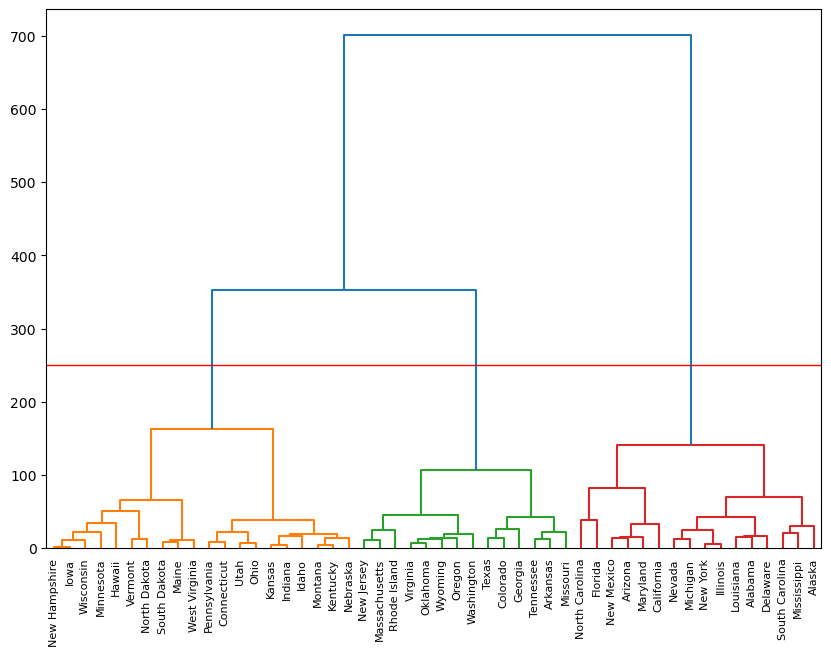

In [9]:
ward = linkage(df_usa.loc[:, 'Murder':], metric='euclidean', method='ward')

plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=labellist, distance_sort='descending', color_threshold=250, show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [10]:
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [11]:
df_usa['Assignments'] = assignments
df_usa

,State,Murder,Assault,UrbanPop,Rape,Assignments
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [12]:
df_usa.loc[:, 'Murder':].groupby('Assignments').mean()

,Murder,Assault,UrbanPop,Rape
Assignments,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


### 비계층적 군집분석


 #### K-means 알고리즘

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

In [14]:
df_iris = pd.read_csv('./data/iris.csv')
df_iris_X = df_iris.drop('target', axis=1)
df_iris_X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df_iris_X.shape

(150, 4)

In [19]:
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
from sklearn.metrics import calinski_harabasz_score as chs

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=1).fit(df_iris_X)
    labels = km.labels_
    print('[{}]\t'.format(k), 'calinski harabasz score: ', chs(df_iris_X, labels))


[2]	 calinski harabasz score:  513.3038433517568
[3]	 calinski harabasz score:  560.3999242466402
[4]	 calinski harabasz score:  529.1207190840455
[5]	 calinski harabasz score:  494.0943819140987
[6]	 calinski harabasz score:  471.65021087892444
[7]	 calinski harabasz score:  448.33207182773526
[8]	 calinski harabasz score:  436.92028527534933
[9]	 calinski harabasz score:  407.12343463976123


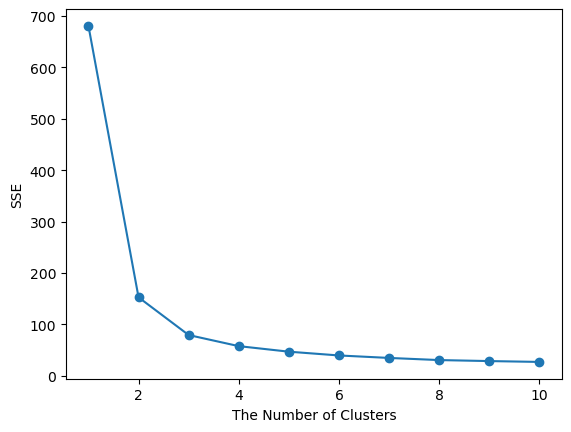

[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.535582051282056, 39.18020672938385, 34.36574278696132, 30.207410380445545, 28.25091058941059, 26.60462262734897]


In [23]:
import matplotlib.pyplot as plt

def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1).fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(df_iris_X)

In [31]:
kmF = KMeans(n_clusters=3, random_state=1)
kmF.fit(df_iris_X)

new_labels = kmF.labels_
df_iris['cluster']=new_labels

df_f = df_iris.drop(columns='target')

df_f.groupby(by='cluster').mean()
# df_iris

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


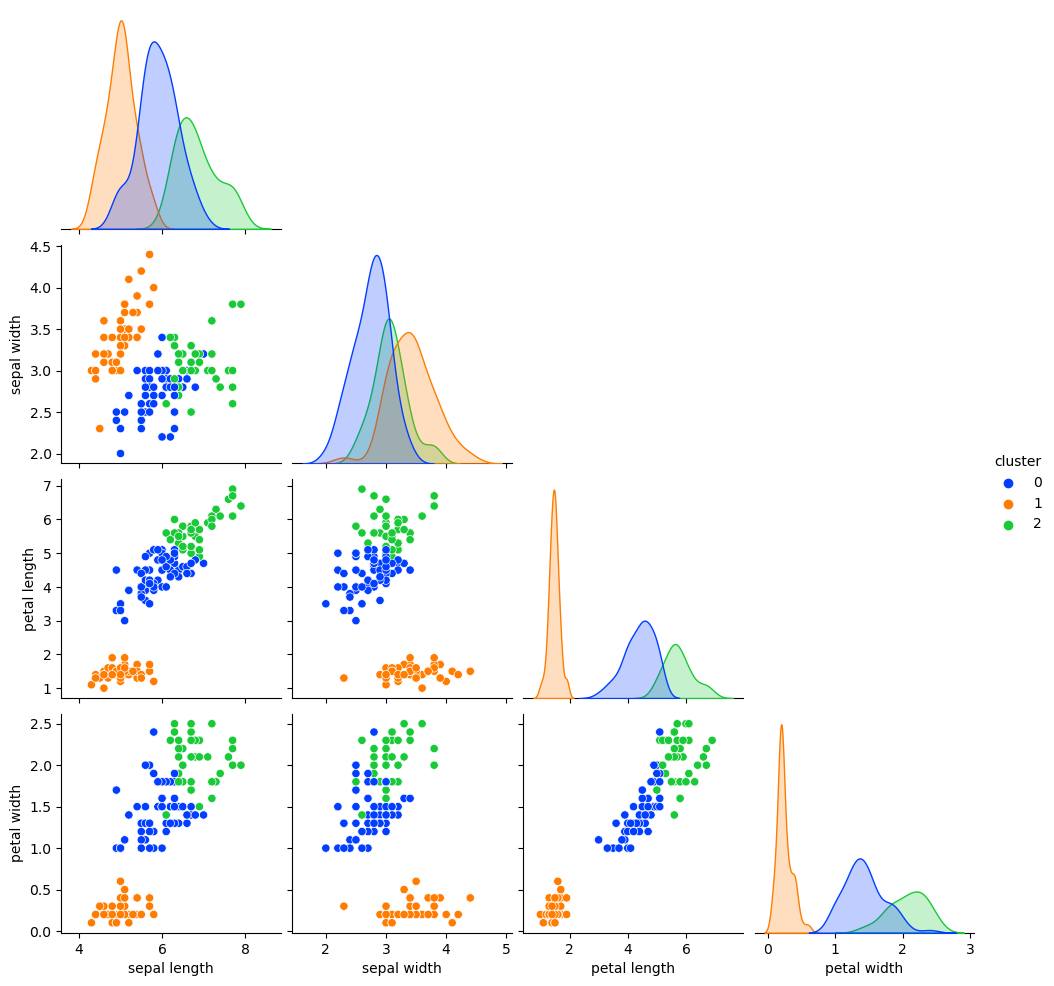

In [32]:
import seaborn as sns
sns.pairplot(df_f, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

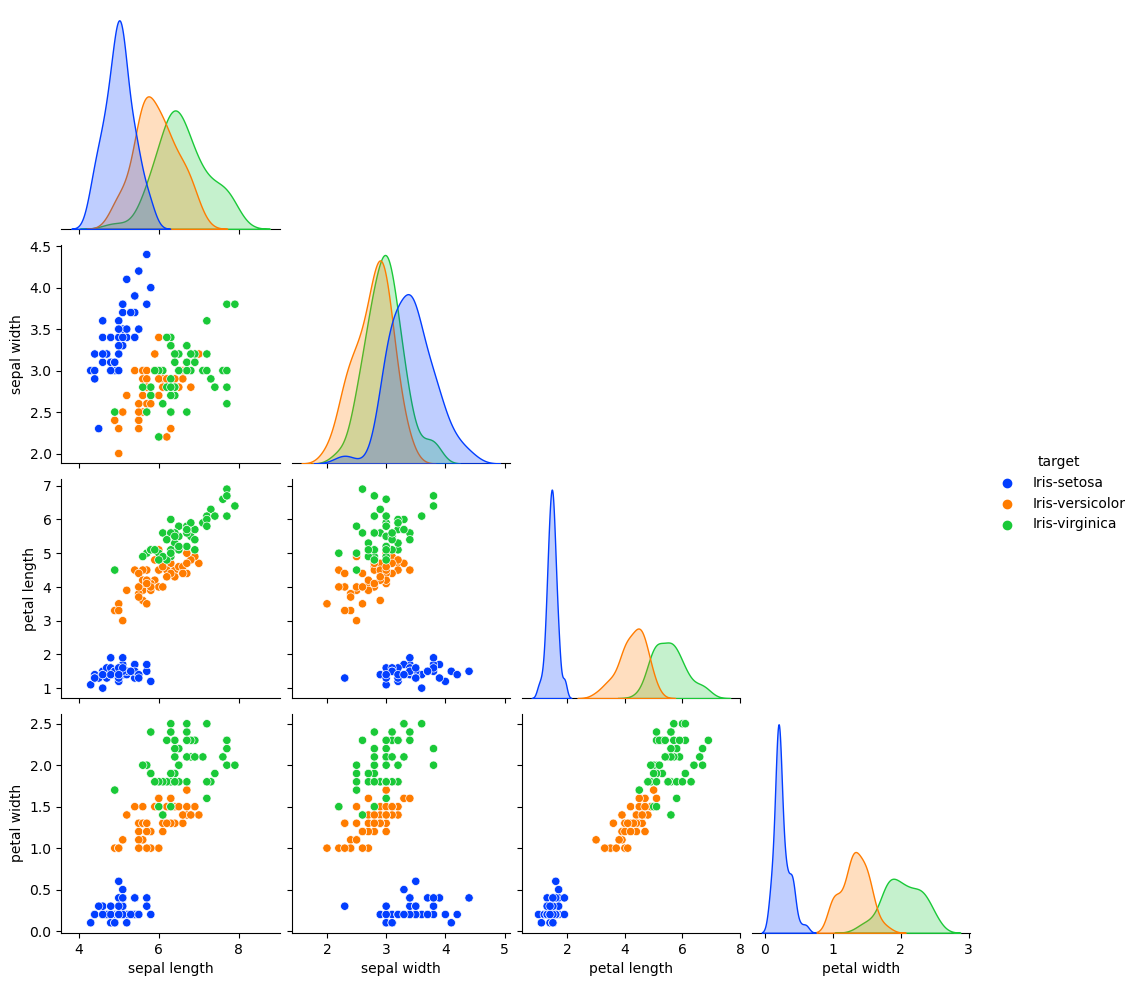

In [35]:
sns.pairplot(df_iris.drop(columns='cluster'), diag_kind='kde', hue='target', corner=True, palette='bright')
plt.show()

#### 혼합분포 군집분석

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [45]:
df_X2 = df_iris.drop(columns=['target', 'cluster'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_X2)
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [46]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
df_X2['gmm_cluster']=gmm_labels

clusters=[0,1,2]
df_X2.groupby(by='gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


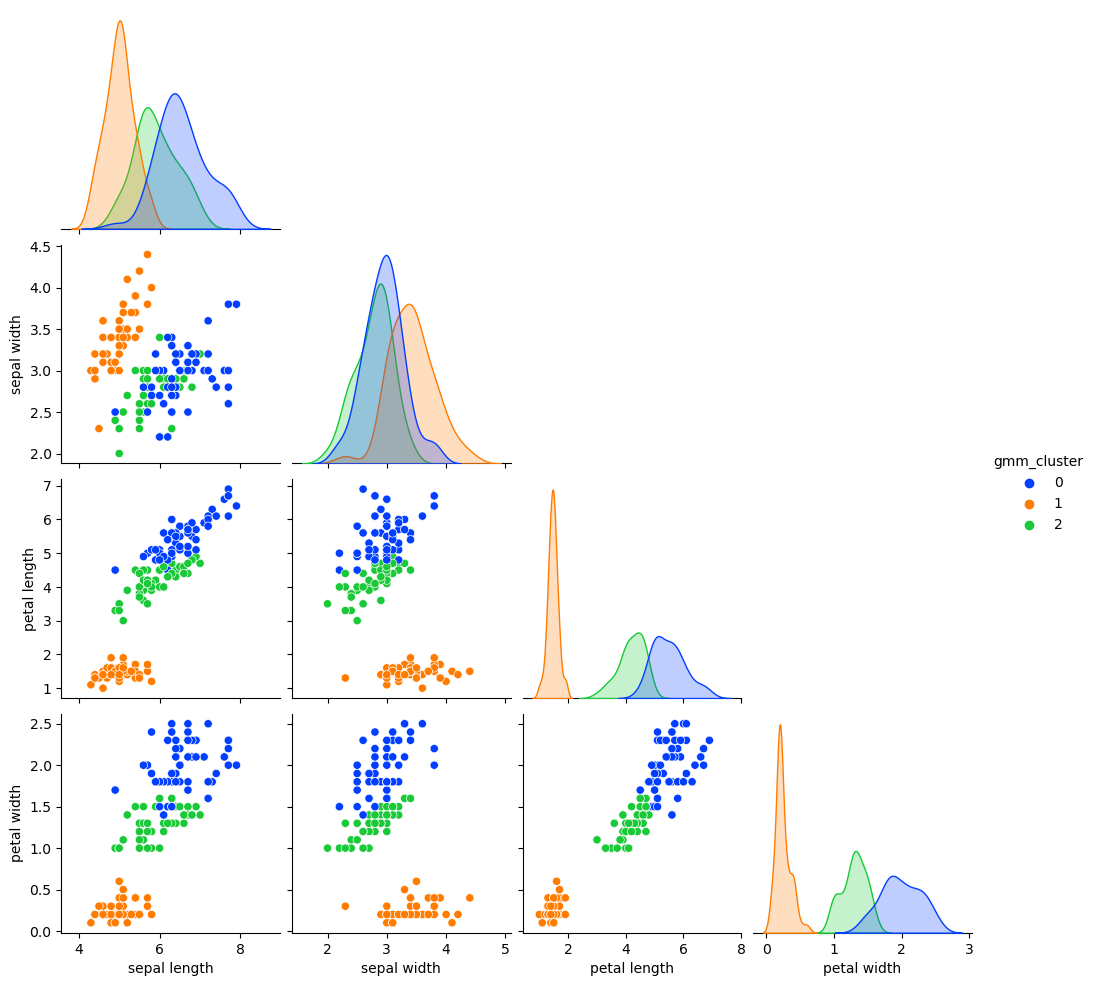

In [49]:
sns.pairplot(df_X2, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')
plt.show()